Problem 1. Write a Python function compute_slope_estimator, which takes in two input variables, x and y. The variables x and y should be 1-dimensional NumPy arrays that have the same length n. The function should return the optimal value of the slope from Equation 4.

In [1]:
import numpy as np
def compute_slope_estimator(x,y):
    n = x.shape[0]
    x_mean = np.sum(x,axis = 0) / n
    y_mean = np.sum(y,axis = 0) / n
    sum_xy = np.sum(x*y, axis = 0)
    sum_xx = np.sum(x*x, axis = 0)
    a = (sum_xy - n * x_mean * y_mean) / (sum_xx - n*x_mean*x_mean)
    return a

Problem 2. Write a Python function compute_intercept_estimator, which takes in two input variables, x and y. The variables x and y should be 1-dimensional NumPy arrays that have the same length n. The function should return the optimal value of the intercept from Equation 5.

In [2]:
def compute_intercept_estimator(x,y):
    n = x.shape[0]
    x_mean = np.sum(x,axis = 0) / n
    y_mean = np.sum(y,axis = 0) / n
    sum_xy = np.sum(x*y, axis = 0)
    sum_xx = np.sum(x*x, axis = 0)
    a = (sum_xy - n * x_mean * y_mean) / (sum_xx - n*x_mean*x_mean)
    b = y_mean - a * x_mean
    return b

Problem 3. Write a function train_model, which takes in two 1-dimensional NumPy ar-
rays of the same length, x and y. It should use compute_slope_estimator and compute_intercept_estimator, and return a tuple of values: the optimal value of the slope and the optimal value of the
intercept.
The elements in the array y can be considered our training set: we use them to estimate the optimal values of the slope and intercept.

In [3]:
def train_model(x,training_set):
    return (compute_slope_estimator(x,training_set), compute_intercept_estimator(x,training_set))

Problem 4. Write a function sample_linear_model which takes four arguments: x_vals, a, b, and sd. The variable x_vals is a 1-dimensional NumPy array of length n. The function should return a NumPy array y of length n, where each element of yi has been sampled from: yi = a · xi + b + εi. Here εi should follow a normal distribution with mean equal to 0 and standard deviation equal to sd.
This function describes the generative model that we believe our dataset was sampled from.
(You should use NumPy’s built in functions for sampling from a normal distribution.)

In [4]:
def sample_linear_model(x,slope,intercept,sd):
    n = x.shape[0]
    e = np.random.normal(0 , sd, n)
    y = slope * x + intercept + e
    return y

Problem 5. Write a function sample_datasets which takes five arguments (the first four the same as in the previous problem): x_vals, a, b, sd, and n. It should return a list of n sampled datasets, where each dataset is constructed using the function sample_linear_model from the previous problem.


In [5]:
def sample_datasets(x,slope,intercept,sd,n):
    result = []
    for i in range(n):
        result.append(sample_linear_model(x,slope,intercept,sd))
    return np.asarray(result)

problem 6

In [6]:
def compute_average_estimated_slope(x_vals,a=1,b=1,sd=1):
    y = sample_datasets(x_vals,a,b,sd,1000)
    slope_sum = 0
    for i in range(1000):
        slope_sum = slope_sum + compute_slope_estimator(x_vals,y[i,:])
    return 1/1000*slope_sum

problem 7

In [7]:
n = 5
# n = 100
# n = 1000
x_vals = np.linspace(0,1,num=n)
compute_average_estimated_slope(x_vals,a=1,b=1,sd=1)
In problem 7, I found that the value of average estimated slope that is returned is around 1 which is setted by us. As n increases, the value of average estimated slope is essentially unchanged.

SyntaxError: invalid syntax (<ipython-input-7-1cfb2175b933>, line 6)

problem 8

In [16]:
def compute_estimated_slope_error(x_vals,a=1,b=1,sd=1):
    y = sample_datasets(x_vals,a,b,sd,1000)
    print(y[999,:])
    error_sum = 0
    for i in range(1000):
        error_sum = error_sum + (1 - compute_slope_estimator(x_vals,y[i,:]))*(1 - compute_slope_estimator(x_vals,y[i,:]))
    return 1/1000*error_sum


In [17]:
m = 10000
x_vals = np.linspace(0,1,num=m)
print(compute_average_estimated_slope(x_vals,a=1,b=1,sd=1))
print(compute_estimated_slope_error(x_vals,a=1,b=1,sd=1))

0.9977489156545863
[0.80697344 1.18363036 0.73488395 ... 1.89262219 1.55918865 1.77579439]
0.0011880378351885677


In problem 8, I found that as n increases the average squared error decreases.

Problem 9. Sample 1000 training sets as in the previous problems, and calculate the estimated value of the slope on each of the 1000 training sets. Collect these 1000 samples together in a NumPy array. Using Matplotlib, create a histogram of these samples.
Try this for different values of x_vals, as in Problems 7 and 8. What do you notice about these distributions?

In [9]:
def compute_1000_estimated_slope(x_vals,a=1,b=1,sd=1):
    y = sample_datasets(x_vals,a,b,sd,1000)
    slope = []
    for i in range(1000):
        slope.append(compute_slope_estimator(x_vals,y[i,:]))
    return np.asarray(slope)


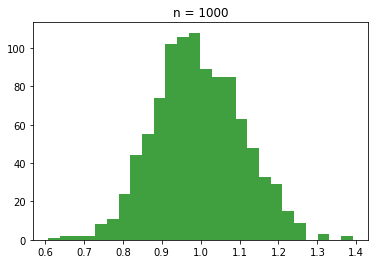

In [43]:
m = 1000
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
x_vals = np.linspace(0,1,num=m)
y_vals = compute_1000_estimated_slope(x_vals,a=1,b=1,sd=1)

num_bins = 'auto'


n, bins, patches = plt.hist(y_vals, num_bins , density=False, facecolor='g', alpha=0.75)
# plt.xlim([0,2])
plt.title('n = 1000')
plt.savefig('n=1000.png')
plt.show()

In problem 9, we can notice that the distributions for different values of x are all normal distribution.

problem 10

In [27]:
def calculate_prediction_error(y,y_hat):
    n = y.shape[0]
    sum_error = 0
    for i in range(n):
        sum_error = sum_error + (y[i]-y_hat[i])*(y[i]-y_hat[i])
    return 1/n*sum_error

problem11

In [39]:
def average_training_set_error(x_vals,a=1,b=1,sd=1):
    y = sample_datasets(x_vals,a,b,sd,1000)
    y_hat = np.zeros((1000,))
    error = 0
    for i in range(1000):
        slope = compute_slope_estimator(x_vals,y[i,:])
        intercept = compute_intercept_estimator(x_vals,y[i,:])
        y_hat = slope *x_vals + intercept
        error = error + calculate_prediction_error(y[i,:],y_hat)
    return 1/1000*error

In [45]:
m = 100
x_vals = np.linspace(0,1,num=m)
print(average_training_set_error(x_vals,a=1,b=1,sd=1))

0.9768645158298158


When n = 5, 100, 1000, the value of error is respectively about 0.605,0.976,0.999. As the number of elements in x_vals increases, the average prediction error increases, and approaches 1. 

Problem 12

In [51]:
def average_test_set_error(x_vals,a=1,b=1,sd=1):
#     y_test = sample_linear_model(x_vals,a,b,sd)
    y_train = sample_datasets(x_vals,a,b,sd,1000)
    y_hat = np.zeros((1000,))
    error = 0
    for i in range(1000):
        y_test = sample_linear_model(x_vals,a,b,sd)
        slope = compute_slope_estimator(x_vals,y_train[i,:])
        intercept = compute_intercept_estimator(x_vals,y_train[i,:])
        y_hat = slope *x_vals + intercept
        error = error + calculate_prediction_error(y_test,y_hat)
    return 1/1000*error

In [60]:
m = 1000
x_vals = np.linspace(0,1,num=m)
print(average_test_set_error(x_vals,a=1,b=1,sd=1))

0.9997246186354058


In problem 12, when n = 5, 100, 1000, the value of test set prediction error is 1.39, 1.024, 0.999. As the number of elements in x_vals increases, the average value of the test prediction error decreases, the average values of the training set prediction error increases.

In [17]:
# Problem 6
def compute_average_estimated_slope(x_vals,a=1,b=1,sd=1):

# Problem 7: Free response answer here.

# Problem 8
# Problem 8: Free response answer here.
def compute_estimated_slope_error(x_vals,a=1,b=1,sd=1):

# Problem 9: Include a pyplot graph as an additional file.

# Problem 10
def calculate_prediction_error(y,y_hat):

# Problem 11
# Problem 11: Free response answer here.
def average_training_set_error(x_vals,a=1,b=1,sd=1):

# Problem 12
# Problem 12: Free response answer here.
def average_test_set_error(x_vals,a=1,b=1,sd=1):

IndentationError: expected an indented block (<ipython-input-17-b032ea5e5a93>, line 8)